In [2]:
import numpy as np
import pandas as pd
import os 
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import tensorflow as tf
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
import numpy as np
import plotly.offline as of
import plotly.graph_objs as go
from show_img import show_img
from model import my_model
from plot_conf import plot_conf
from process import process
of.offline.init_notebook_mode(connected=True)
import h5py
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


## Show 3D image 

In [3]:
show_img()

## Image processing

In [4]:
xtrain,xtest,y_train,y_test = process()

x_train shape:  (10000, 4096)
y_train shape:  (10000,)
x_test shape:   (2000, 4096)
y_test shape:   (2000,)
(10000, 16, 16, 16, 3)


## Training and save model

In [9]:
def train(xtrain,y_train):
    checkpoint_path = "training/cp-1.ckpt"
    checkpoint_dir = os.path.dirname(checkpoint_path)

    cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, verbose=1, save_weights_only=True)
    model = my_model()
    adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=True)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['acc'])
    model.build(input_shape=(None, 16,16,16,3))
    model.fit(x=xtrain, y=y_train, batch_size=128, epochs=1, validation_split=0.2,callbacks=[cp_callback])
    return model


In [10]:
model = train(xtrain,y_train)

63/63 [==============================] - ETA: 0s - loss: 1.7701 - acc: 0.3880
Epoch 00001: saving model to training/cp-1.ckpt
63/63 [==============================] - 39s 627ms/step - loss: 1.7701 - acc: 0.3880 - val_loss: 1.3144 - val_acc: 0.5475


In [6]:
def test(model,xtest,y_test):
    checkpoint_path = "training/cp-1.ckpt"
    model.load_weights(checkpoint_path)
    model.evaluate(x=xtest,y=y_test)
    predictions = model.predict(xtest)
    pred_class = tf.math.argmax(predictions,1)
    return pred_class

63/63 [==============================] - 1s 20ms/step - loss: 1.3855 - acc: 0.5300


In [ ]:
pred_class = test(model,xtest,y_test)

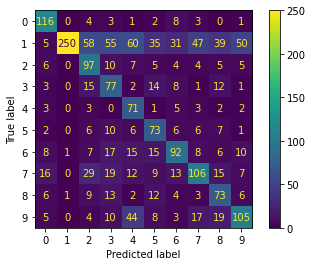

In [7]:
plot_conf(pred_class, y_test)